# Vehicle Price Prediction (currency: Naira): Getting to Know The Data

Throughout this project, weyou will be working with the [Autochek Data](https://github.com/foskyblue/vehicle_price_prediction_system/tree/main/data).  

To get started, we will read in the libraries and the two datasets needed throughout the project using the code below.

 

### Outline

1. Problem Statement
2. Project Overview & Motivation 
2. Metrics 
4. Take a Look At The Data  
5. Data Cleaning 
6. Exploratory Data Analysis (EDA)
7. Modeling
8. Save the clean dataset into an sqlite database.
9. Refinement
10. Future Improvements
11. References

### 1. Problem Statement 

In Nigeria today, individuals and business (private & public) uses vehicles as a means of transportation and other means. Having a good knowledge of market prices of different vehicles before purchasing one is a major challenge that people face daily and there's not enough resources to assist in decision  making. Some persons will blindly visit online websites to search for vehicles to purchase without a good knowledge of how their choice of vehicle will compare with others of the same features in terms of price. This lack of knowledge can lead some individuals to purchase vehicles for a higher price.

### 2. Project Overview & Motivation

There are thousands of vehicles being sold locally each day in Nigeria. However, there's no optimized method of telling if the vehicle that one is about to purchase is truly worth the price or not. This motivated me to build and deploy a web based machine learning model that will assist both potential buyers and sellers to estimate the cost of a vehicle based on some well known features.

### 3. Metrics

In this project, the r2 score is used as a measure of performance. Other estimator measure like RMSE, MSE, and MAE will also be used.


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sqlalchemy import create_engine
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

%matplotlib inline

cars = pd.read_csv('cars.csv')
trucks = pd.read_csv('trucks.csv')


## 4. Take a Look At The Data 

First, we take a look at the data, describe the numeric columns and also try to understand other relevant columns.

In [2]:
print(cars.shape)
cars.head()

(4838, 40)


,id,year,insured,mileage,vin,licensePlate,price,createdBy,marketplacePrice,marketplaceVisible,...,engineType,gradeScore,installment,depositReceived,isFirstOwner,firstOwnerName,firstOwnerPhone,loanValue,websiteUrl,hasThreeDImage
0,-wUDJb_wi,2011,False,157208,4t3z*************,not registered,5700000,Ax-vQrrNk,5715000,True,...,6-cylinder(I6),5.0,259012,False,True,NaN,NaN,6343150.0,https://autochek.africa/ng/car/venza-toyota-re...,False
1,c3EaROAlF,2018,False,85411,LMGA*************,not registered,8300000,cLF6mr5wJ,8315000,True,...,4-cylinder(I4),5.0,369920,False,True,NaN,NaN,9059250.0,https://autochek.africa/ng/car/gs8-gac--ref-c3...,False
2,vONoo3_zo,2006,False,89837,2T1B*************,not registered,2700000,hfixASIWj,2715000,True,...,4-cylinder(I4),4.5,128925,False,True,NaN,NaN,3157336.0,https://autochek.africa/ng/car/corolla-toyota-...,False
3,xO2MCiD9D,2009,False,175510,4T3B*************,not registered,7000000,gRHB-cDwM,7015000,True,...,4-cylinder(I4),3.9,0,False,True,NaN,NaN,0.0,https://autochek.africa/ng/car/venza-toyota-re...,False
4,jO0-6GrBG,2009,False,91158,4T1B*************,not registered,3100000,gRHB-cDwM,3115000,True,...,4-cylinder(I4),4.5,146400,False,True,NaN,NaN,3585286.0,https://autochek.africa/ng/car/camry-toyota-re...,False


In [3]:
print(trucks.shape)
trucks.head()

(143, 40)


,id,year,insured,mileage,vin,licensePlate,price,createdBy,marketplacePrice,marketplaceVisible,...,engineType,gradeScore,installment,depositReceived,isFirstOwner,firstOwnerName,firstOwnerPhone,loanValue,websiteUrl,hasThreeDImage
0,Pk4we5qus,1994,False,0,VLUP*************,not registered,10000000,sK6i0ajRop,10015000,True,...,6-cylinder(V6),4.0,0,False,True,NaN,NaN,0,https://autochek.africa/ng/car/p113-scania-ref...,False
1,Byxy2vGgu,2001,False,663251,WDB6*************,not registered,8500000,sK6i0ajRop,8515000,True,...,6-cylinder(V6),4.2,0,False,True,NaN,NaN,0,https://autochek.africa/ng/car/1217-mercedes-b...,False
2,lja7lZOAg,2001,False,627719,WDB6*************,not registered,8500000,sK6i0ajRop,8515000,True,...,6-cylinder(V6),4.2,0,False,True,NaN,NaN,0,https://autochek.africa/ng/car/1117-mercedes-b...,False
3,bWJcJUiz8,2001,False,796025,WDB6*************,not registered,8000000,sK6i0ajRop,8015000,True,...,6-cylinder(V6),4.1,0,False,True,NaN,NaN,0,https://autochek.africa/ng/car/1117-mercedes-b...,False
4,OP07rd4D0,2000,False,0,XZU3*********,not registered,6500000,sK6i0ajRop,6515000,True,...,4-cylinder(I4),4.0,0,False,True,NaN,NaN,0,https://autochek.africa/ng/car/dyna-toyota-ref...,False


In [4]:
# trucks.dtypes[trucks.dtypes == object]
# trucks.year.dtypes

In [5]:
# Here we can see that both datasets have same number of identical columns
print("total car features: ", len(cars.columns))
print("total truck features: ", len(trucks.columns))
print(list(set(cars.columns) & set(trucks.columns))) 

total car features:  40
total truck features:  40
['carManagerId', 'insured', 'hasThreeDImage', 'model_brand_name', 'firstOwnerPhone', 'hasWarranty', 'loanValue', 'ownerId', 'fuelType', 'country', 'isFirstOwner', 'interiorColor', 'licensePlate', 'marketplaceOldPrice', 'mileage', 'engineType', 'mileageUnit', 'bodyType', 'marketplaceVisibleDate', 'websiteUrl', 'depositReceived', 'exteriorColor', 'state', 'transmission', 'createdAt', 'year', 'installment', 'marketplaceVisible', 'city', 'gradeScore', 'sellingCondition', 'model_name', 'id', 'price', 'vin', 'createdBy', 'marketplacePrice', 'ownerType', 'firstOwnerName', 'address']


In [6]:
# number of cars
print("The number of cars is {}.".format(cars.shape[0]))

# number of trucks
print("The number of trucks is {}.".format(trucks.shape[0]))

# maximum car price
print("The maximum car price is {}.".format(cars['marketplacePrice'].max()))

# minimum car price
print("The minimum car price is {}.".format(cars['marketplacePrice'].min()))

# maximum truck price
print("The maximum truck price is {}.".format(trucks['marketplacePrice'].max()))

# minimum truck price
print("The minimum truck price is {}.".format(trucks['marketplacePrice'].min()))


The number of cars is 4838.
The number of trucks is 143.
The maximum car price is 148015008.
The minimum car price is 435000.
The maximum truck price is 30515000.
The minimum truck price is 2465000.


In [7]:
cars.describe()

,year,mileage,price,marketplacePrice,marketplaceOldPrice,gradeScore,installment,loanValue
count,4838.000000,4.838000e+03,4.838000e+03,4.838000e+03,4.838000e+03,4838.000000,4.838000e+03,4.838000e+03
mean,2010.220132,1.178834e+05,8.074206e+06,8.089206e+06,2.078976e+09,4.770008,3.212442e+05,7.645126e+06
std,4.737923,1.110966e+05,9.976460e+06,9.976460e+06,1.437696e+11,0.247334,4.669607e+05,1.075324e+07
min,1970.000000,0.000000e+00,4.200000e+05,4.350000e+05,0.000000e+00,3.000000,0.000000e+00,0.000000e+00
25%,2007.000000,6.514225e+04,3.400000e+06,3.415000e+06,3.115000e+06,4.700000,0.000000e+00,0.000000e+00
50%,2010.000000,9.884500e+04,5.000000e+06,5.015000e+06,4.755000e+06,4.800000,2.178350e+05,5.246356e+06
75%,2014.000000,1.528638e+05,8.400000e+06,8.415000e+06,8.065000e+06,4.900000,3.711818e+05,8.812595e+06
max,2021.000000,2.550807e+06,1.480000e+08,1.480150e+08,1.000000e+13,5.000000,7.802173e+06,1.570566e+08


In [8]:
trucks.describe()

,year,mileage,price,marketplacePrice,marketplaceOldPrice,gradeScore,installment,firstOwnerName,firstOwnerPhone,loanValue
count,143.000000,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,143.000000,1.430000e+02,0.0,0.0,1.430000e+02
mean,2002.237762,139581.391608,1.021434e+07,1.022934e+07,1.022584e+07,4.249650,3.470351e+05,NaN,NaN,8.498810e+06
std,8.285366,230251.723982,6.136383e+06,6.136383e+06,6.136362e+06,0.371498,3.303964e+05,NaN,NaN,8.091335e+06
min,1984.000000,0.000000,2.450000e+06,2.465000e+06,2.465000e+06,3.600000,0.000000e+00,NaN,NaN,0.000000e+00
25%,1997.000000,0.000000,6.200000e+06,6.215000e+06,6.215000e+06,4.000000,0.000000e+00,NaN,NaN,0.000000e+00
50%,2001.000000,0.000000,9.000000e+06,9.015000e+06,9.015000e+06,4.100000,3.368580e+05,NaN,NaN,8.249575e+06
75%,2006.000000,218241.000000,1.125000e+07,1.126500e+07,1.126500e+07,4.500000,4.666010e+05,NaN,NaN,1.142695e+07
max,2021.000000,948209.000000,3.050000e+07,3.051500e+07,3.051500e+07,5.000000,1.331553e+06,NaN,NaN,3.260945e+07


In [9]:
# cars[cars['year']==2021]['websiteUrl'].values
# trucks.sort_values(by=['marketplacePrice'], ascending=False).head(10)['websiteUrl'].values

Fortunately, there are no duplicates for both datasets as seen in the next two cells below..

In [10]:
trucks[trucks.duplicated()]

,id,year,insured,mileage,vin,licensePlate,price,createdBy,marketplacePrice,marketplaceVisible,...,engineType,gradeScore,installment,depositReceived,isFirstOwner,firstOwnerName,firstOwnerPhone,loanValue,websiteUrl,hasThreeDImage


In [11]:
cars[cars.duplicated()]

,id,year,insured,mileage,vin,licensePlate,price,createdBy,marketplacePrice,marketplaceVisible,...,engineType,gradeScore,installment,depositReceived,isFirstOwner,firstOwnerName,firstOwnerPhone,loanValue,websiteUrl,hasThreeDImage


## 5. Data Cleaning

Next, we need to pull some additional relevant information out of the existing columns. Because the data was gotten from crawling a webpage where most of the data points were made available, there won't be too much cleaning required.

For each of the datasets, there are a couple of cleaning steps we need to take care of:

#### Cars & Trucks
* Dropping rows/columns with over 90% of missing values.
* Dropping unimportant/irrelevant rows and/or columns.
* Check and drop duplicate samples.
* Make sure that all features have the required data types for modeling.
* Concatenate both datasets row-wise.
* Create dummy variable for categorical data in the concatenated dataset.

In [12]:
cars.columns

Index(['id', 'year', 'insured', 'mileage', 'vin', 'licensePlate', 'price',
       'createdBy', 'marketplacePrice', 'marketplaceVisible',
       'marketplaceVisibleDate', 'ownerId', 'model_name', 'model_brand_name',
       'state', 'country', 'address', 'carManagerId', 'ownerType',
       'transmission', 'fuelType', 'sellingCondition', 'bodyType', 'city',
       'marketplaceOldPrice', 'createdAt', 'mileageUnit', 'hasWarranty',
       'interiorColor', 'exteriorColor', 'engineType', 'gradeScore',
       'installment', 'depositReceived', 'isFirstOwner', 'firstOwnerName',
       'firstOwnerPhone', 'loanValue', 'websiteUrl', 'hasThreeDImage'],
      dtype='object')

#### Dropping rows/columns with over 90% of missing values.

In [13]:
# Drop all columns/rows with missing values over 90%
# The columns 'firstOwnerName' and 'firstOwnerPhone' will be dropped

cars.drop(cars.columns[cars.isna().sum()/cars.shape[0] > .9].tolist(), axis=1, inplace=True)
trucks.drop(trucks.columns[trucks.isna().sum()/trucks.shape[0] > .9].tolist(), axis=1, inplace=True)

In [14]:
cars.columns

Index(['id', 'year', 'insured', 'mileage', 'vin', 'licensePlate', 'price',
       'createdBy', 'marketplacePrice', 'marketplaceVisible',
       'marketplaceVisibleDate', 'ownerId', 'model_name', 'model_brand_name',
       'state', 'country', 'address', 'carManagerId', 'ownerType',
       'transmission', 'fuelType', 'sellingCondition', 'bodyType', 'city',
       'marketplaceOldPrice', 'createdAt', 'mileageUnit', 'hasWarranty',
       'interiorColor', 'exteriorColor', 'engineType', 'gradeScore',
       'installment', 'depositReceived', 'isFirstOwner', 'loanValue',
       'websiteUrl', 'hasThreeDImage'],
      dtype='object')

#### Dropping irrelevant rows and/or columns.variables cars_new and trucks_new respectively.

We can drop some extra unuseful coumns from the cars and trucks data frame and store in a new variable. 

In [15]:
columns_to_be_dropped = ['id', 'vin', 'licensePlate', 'createdBy', 'marketplaceVisibleDate', 'ownerId', 'country',
                        'address', 'state', 'carManagerId', 'city', 'createdAt', 'hasWarranty', 'loanValue', 'websiteUrl',
                        'installment', 'insured', 'marketplaceVisible', 'ownerType', 'depositReceived', 'hasThreeDImage']
cars_new = cars.drop(columns_to_be_dropped, axis=1)
trucks_new = trucks.drop(columns_to_be_dropped, axis=1)

In [16]:
cars_new.head()

,year,mileage,price,marketplacePrice,model_name,model_brand_name,transmission,fuelType,sellingCondition,bodyType,marketplaceOldPrice,mileageUnit,interiorColor,exteriorColor,engineType,gradeScore,isFirstOwner
0,2011,157208,5700000,5715000,Venza,Toyota,automatic,petrol,foreign,SUV,5915000,km,Grey,Silver,6-cylinder(I6),5.0,True
1,2018,85411,8300000,8315000,GS8,GAC,automatic,petrol,foreign,SUV,8315000,km,Black,Black,4-cylinder(I4),5.0,True
2,2006,89837,2700000,2715000,Corolla,Toyota,automatic,petrol,foreign,Sedan,2715000,km,Grey,Silver,4-cylinder(I4),4.5,True
3,2009,175510,7000000,7015000,Venza,Toyota,automatic,petrol,foreign,SUV,7015000,km,Beige,Black,4-cylinder(I4),3.9,True
4,2009,91158,3100000,3115000,Camry,Toyota,automatic,petrol,foreign,Sedan,3115000,km,Grey,Silver,4-cylinder(I4),4.5,True


In [17]:
# pd.get_dummies(cars_new['model_name'])

We can check for the correlation between numerical features to further eliminate irrelevant columns. From the website where the data was gotten from, there's only one price made public and that's the 'marketplacePrice'. However, in our dataset we can see other vehicle price columns, 'price', and 'marketplaceOldPrice'.

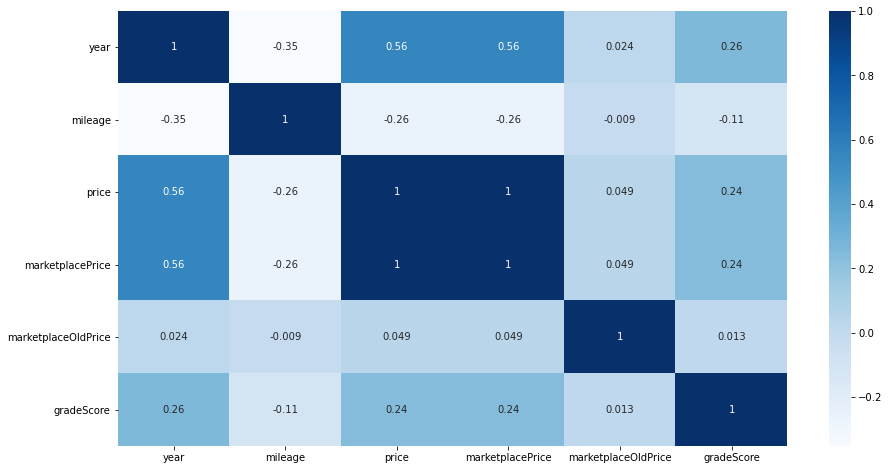

In [18]:
# sns heatmap
plt.figure(figsize=(15,8))
temp_df = cars_new[['year', 'mileage', 'price', 'marketplacePrice', 'marketplaceOldPrice', 'gradeScore']]
corr = temp_df.corr()
sns.heatmap(corr, cmap="Blues", annot=True);

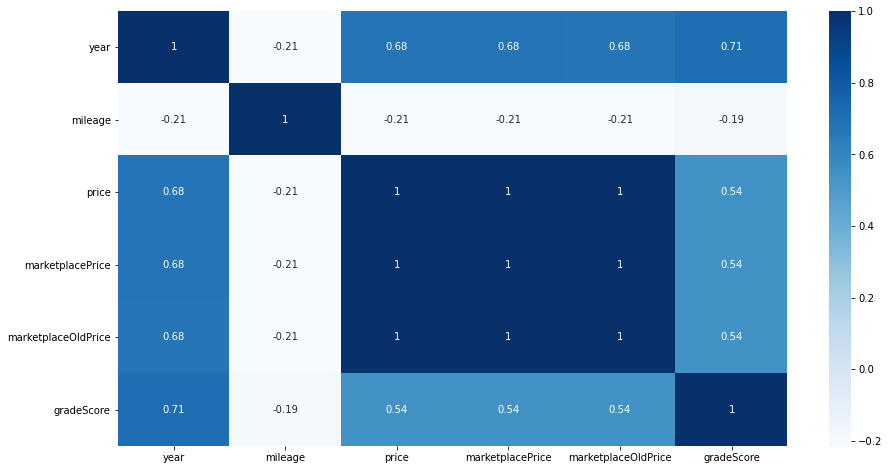

In [19]:
temp_df2 = trucks_new[['year', 'mileage', 'price', 'marketplacePrice', 'marketplaceOldPrice', 'gradeScore']]
corr2 = temp_df2.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr2, cmap="Blues", annot=True);

In the trucks dataset we can clearly see that there's a strong correlation between certain features. With this in mind, we can eliminate the following features from the datasets:

* <b>price</b>: This seems to be the official price that the client is willing to sell the vehicle at. But the merchant has added an additional 15,000 Naira to ge the marketplacePrice.
* <b>marketplaceOldPrice</b>: This is identitical to the marketplacePrice.

In [20]:
columns_to_drop = ['price', 'marketplaceOldPrice']
cars_new = cars_new.drop(columns_to_drop, axis=1)
trucks_new = trucks_new.drop(columns_to_drop, axis=1)

In [21]:
cars_new.head()

,year,mileage,marketplacePrice,model_name,model_brand_name,transmission,fuelType,sellingCondition,bodyType,mileageUnit,interiorColor,exteriorColor,engineType,gradeScore,isFirstOwner
0,2011,157208,5715000,Venza,Toyota,automatic,petrol,foreign,SUV,km,Grey,Silver,6-cylinder(I6),5.0,True
1,2018,85411,8315000,GS8,GAC,automatic,petrol,foreign,SUV,km,Black,Black,4-cylinder(I4),5.0,True
2,2006,89837,2715000,Corolla,Toyota,automatic,petrol,foreign,Sedan,km,Grey,Silver,4-cylinder(I4),4.5,True
3,2009,175510,7015000,Venza,Toyota,automatic,petrol,foreign,SUV,km,Beige,Black,4-cylinder(I4),3.9,True
4,2009,91158,3115000,Camry,Toyota,automatic,petrol,foreign,Sedan,km,Grey,Silver,4-cylinder(I4),4.5,True


In [22]:
trucks_new.head()

,year,mileage,marketplacePrice,model_name,model_brand_name,transmission,fuelType,sellingCondition,bodyType,mileageUnit,interiorColor,exteriorColor,engineType,gradeScore,isFirstOwner
0,1994,0,10015000,P113,Scania,manual,diesel,foreign,Truck,km,Grey,White,6-cylinder(V6),4.0,True
1,2001,663251,8515000,1217,Mercedes-Benz,manual,diesel,foreign,Truck,km,Grey,Green,6-cylinder(V6),4.2,True
2,2001,627719,8515000,1117,Mercedes-Benz,manual,diesel,foreign,Truck,km,Grey,White,6-cylinder(V6),4.2,True
3,2001,796025,8015000,1117,Mercedes-Benz,manual,diesel,foreign,Truck,km,Grey,White,6-cylinder(V6),4.1,True
4,2000,0,6515000,Dyna,Toyota,manual,diesel,foreign,Truck,km,Grey,White,4-cylinder(I4),4.0,True


In [23]:
cars_new.shape

(4838, 15)

In [24]:
trucks_new.shape

(143, 15)

In [25]:
vehicles = pd.concat([cars_new, trucks_new], ignore_index=True)
print(vehicles.shape)
vehicles.head()

(4981, 15)


,year,mileage,marketplacePrice,model_name,model_brand_name,transmission,fuelType,sellingCondition,bodyType,mileageUnit,interiorColor,exteriorColor,engineType,gradeScore,isFirstOwner
0,2011,157208,5715000,Venza,Toyota,automatic,petrol,foreign,SUV,km,Grey,Silver,6-cylinder(I6),5.0,True
1,2018,85411,8315000,GS8,GAC,automatic,petrol,foreign,SUV,km,Black,Black,4-cylinder(I4),5.0,True
2,2006,89837,2715000,Corolla,Toyota,automatic,petrol,foreign,Sedan,km,Grey,Silver,4-cylinder(I4),4.5,True
3,2009,175510,7015000,Venza,Toyota,automatic,petrol,foreign,SUV,km,Beige,Black,4-cylinder(I4),3.9,True
4,2009,91158,3115000,Camry,Toyota,automatic,petrol,foreign,Sedan,km,Grey,Silver,4-cylinder(I4),4.5,True


In [26]:
vehicles.dtypes[vehicles.dtypes == object]

model_name          object
model_brand_name    object
transmission        object
fuelType            object
sellingCondition    object
bodyType            object
mileageUnit         object
interiorColor       object
exteriorColor       object
engineType          object
dtype: object

In [27]:
# print(vehicles.shape)
# vehicles.describe()

## 6. Exploratory Data Analysis (EDA)

Here I'll provide some insight into the descriptive statistics of the data.

* What's the price distribution of vehicles in the dataset? 
* What is the average price for different vehicle body types (sedan, SUV, e.t.c)?
* What is the most expensive vehicle by model brand, name and price?
* The most popular vehicle by model brand and model name.

Firstly, we will visualize the relationship between numerical features using Seaborn's pairplot.

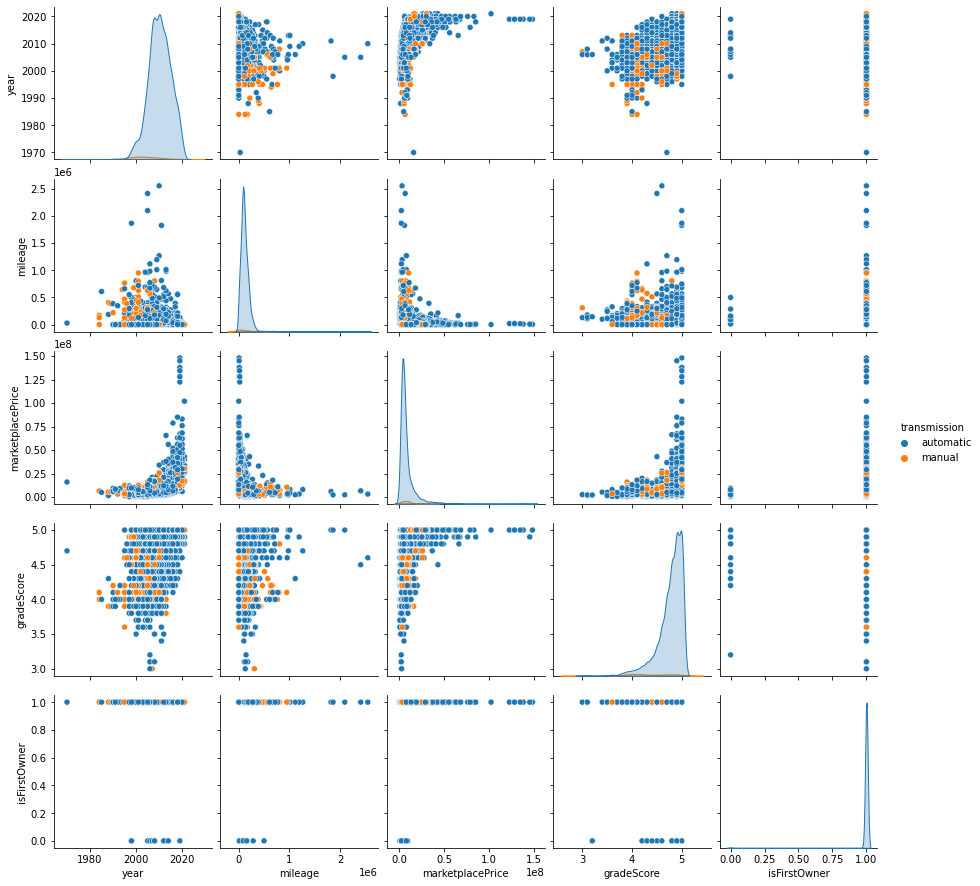

In [28]:
sns.pairplot(vehicles, hue='transmission'); 

From the pairplot above we can see some interesting relationships between the price of the vehicle and other features, e.g. year, mileage, and gradeScore. An increase in these features seems to be directly proportional to the price of a vehicle in most cases, except for the mileage which seems to be inversly proportional which is quite intuitive. 

To have more insight on the price of the vehicles, we will display a plot showing the price distribution and try to estimate the type of distribution it has using the Chi-square method used in the article from [Abhishek Mungoli.](https://towardsdatascience.com/identify-your-datas-distribution-d76062fc0802) 

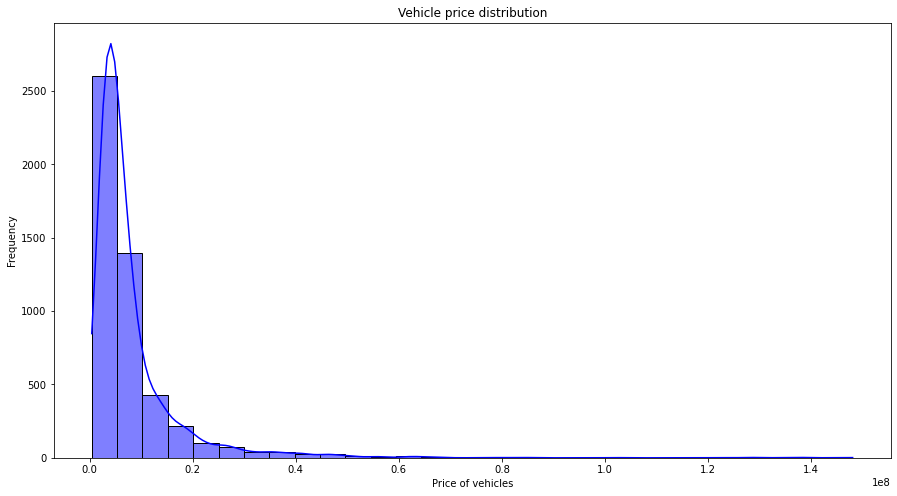

In [29]:
# Vehicles price distribution

plt.figure(figsize=(15,8))
ax = sns.histplot(vehicles['marketplacePrice'].values, color="blue", kde=True, bins=30).set_title('Vehicle price distribution');
# ax = sns.scatterplot(data=vehicles, x='marketplacePrice', y='mileage')
plt.xlabel('Price of vehicles');
plt.ylabel('Frequency');

In [30]:
def standarise(df, column, pct, pct_lower):
    """Get all the required parameters needed to estimate distribution.

    Args:
        df (dataframe): data frame with target data
        column (str): target variable
        pct (float): 
        pct_lower (float): 

    Returns:
        y_std: standardised dataset (0 mean 1 std)
        len_y: length of target variable

    """
    sc = StandardScaler() 
    y = df[column][df[column].notnull()].to_list()
    y.sort()
    len_y = len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy = ([[x] for x in y])
    sc.fit(yy)
    y_std = sc.transform(yy)
    y_std = y_std.flatten()
    
    return y_std, len_y, y


def fit_distribution(df, column, pct, pct_lower):
    """Fitting different Distributions and checking Goodness of fit based on Chi-square Statistics.

    Args:
        df (dataframe): data frame with target data
        column (str): target variable
        pct (float): 
        pct_lower (float): 

    Returns:
        results: dataframe showing different distributions and their respective Chi-square values. 

    """
    y_std, size, y_org = standarise(df, column, pct, pct_lower)
    dist_names = ['weibull_min','norm','weibull_max',
                 'invgauss','uniform','gamma','expon', 'lognorm','pearson3','triang']

    chi_square_statistics = []
    # 11 bins
    percentile_bins = np.linspace(0,100,11)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)

    # Loop through candidate distributions

    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
      

        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)

        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        chi_square_statistics.append(ss)


    #Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)

    return results

In [31]:
fit_distribution(vehicles, 'marketplacePrice', 0.99, 0.01)

(1.0565806015097055, -0.8959959314187045, 0.9186568241167405)

(0.0, 1.0)

(33585.64971379746, 17410.077201722044, 17410.44035125508)

(1.020302807271113, -0.9511479121041684, 0.9322162410391449)

(-0.8959599241605966, 6.539803864089486)

(0.6929886227972767, -0.8959599241605967, 1.1708977305551316)

(-0.8959599241605966, 0.8959599241605966)

(0.9061635090420916, -0.9164123509818438, 0.601015299598326)

(1.7985008935474491, -0.004331772937679631, 0.8019874424844691)

(0.008176978765913445, -0.906610042071568, 6.552659252096724)



,Distribution,chi_square
7,lognorm,47.0
3,invgauss,55.0
8,pearson3,325.0
0,weibull_min,443.0
6,expon,591.0
2,weibull_max,1514.0
5,gamma,2832.0
1,norm,6133.0
9,triang,7955.0
4,uniform,13153.0


In [32]:
y_std, len_y, y = standarise(vehicles, 'marketplacePrice', 0.99, 0.01)

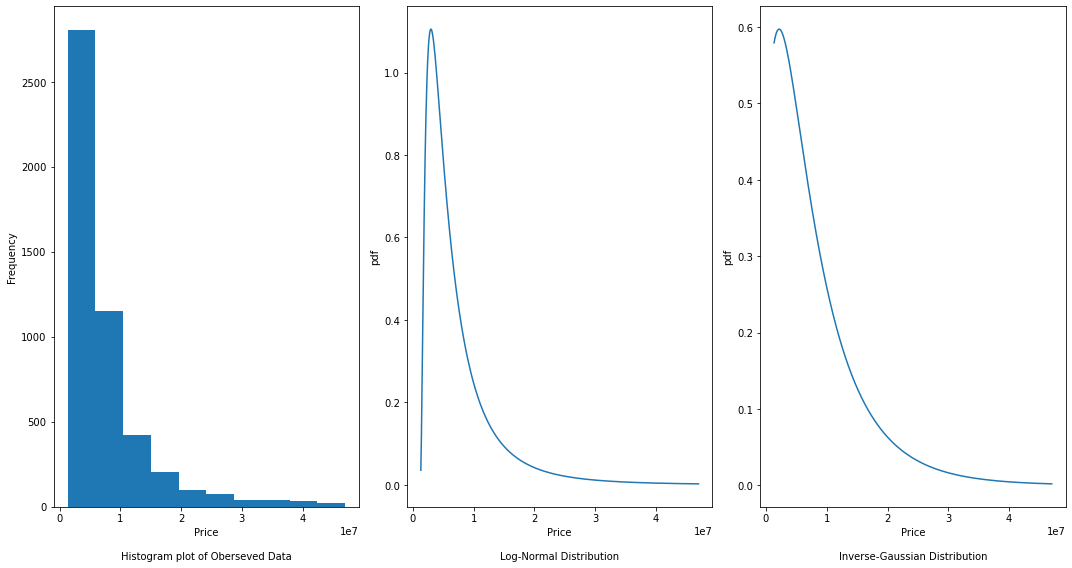

In [33]:
# Comparing the plot distributions of the top 2 estimated distributions and the price distribution plots.

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))
axes[0].hist(y)
axes[0].set_xlabel('Price\n\nHistogram plot of Oberseved Data')
axes[0].set_ylabel('Frequency')
axes[1].plot(y, lognorm.pdf(y_std,0.91, -0.92, 0.60))
axes[1].set_xlabel('Price\n\nLog-Normal Distribution')
axes[1].set_ylabel('pdf')
axes[2].plot(y, invgauss.pdf(y_std,0.45, -1.64, 3.61))
axes[2].set_xlabel('Price\n\nInverse-Gaussian Distribution')
axes[2].set_ylabel('pdf')
fig.tight_layout()

Next, we can also visualize this using a QQ plot.

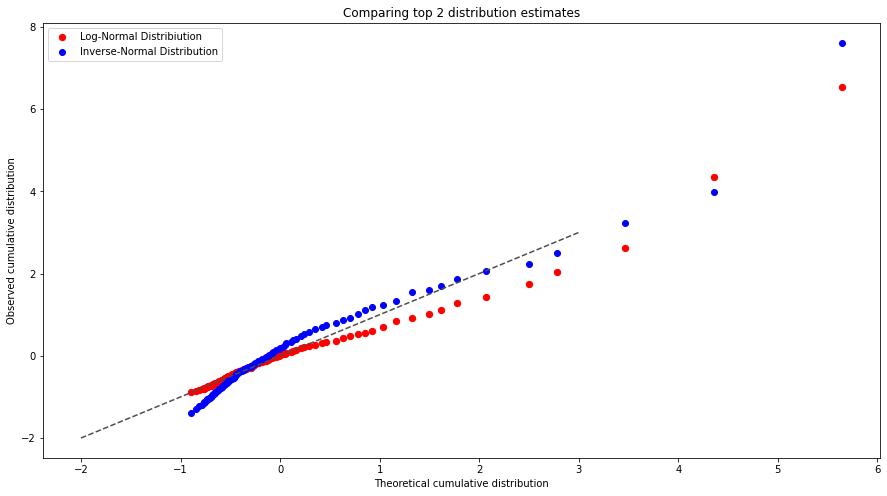

In [34]:
data_points_lognorm = lognorm.rvs(0.91, -0.92, 0.60, size = 1000) 
data_points_invgauss = invgauss.rvs(0.45, -1.64, 3.61, size = 1000)      

f, ax = plt.subplots(figsize=(15, 8))
ax.plot([-2, 3], [-2, 3], ls="--", c=".3")

percentile_bins = np.linspace(0,100,101)
percentile_cutoffs1 = np.percentile(y_std, percentile_bins)
percentile_cutoffs_invgauss = np.percentile(data_points_invgauss, percentile_bins)

percentile_cutoffs_lognorm = np.percentile(data_points_lognorm, percentile_bins)
# print(percentile_cutoffs1,percentile_cutoffs2)

ax.scatter(percentile_cutoffs1, percentile_cutoffs_lognorm, c='r', label = 'Log-Normal Distribiution',s=40)
ax.scatter(percentile_cutoffs1, percentile_cutoffs_invgauss, c='b', label = 'Inverse-Normal Distribution')

ax.set_title('Comparing top 2 distribution estimates')
ax.set_xlabel('Theoretical cumulative distribution')
ax.set_ylabel('Observed cumulative distribution')
ax.legend()
plt.show()

The QQ plot also demonstartes that the Log-normal distribution is a better fit as it's closer to fitting the diagonal dotted lines.

In [35]:
# maximum vehicle price
print("The maximum vehicle price is {}.".format(vehicles['marketplacePrice'].max()))

# minimum vehicle price
print("The minimum vehicle price is {}.".format(vehicles['marketplacePrice'].min()))


The maximum vehicle price is 148015008.
The minimum vehicle price is 435000.


To find the most expensive vehicles by body type, model name and brand, we need to first group the dataframe.

In [36]:
vehicles_grouped_df = vehicles.groupby(['model_brand_name', 'model_name', 'marketplacePrice'])['marketplacePrice']
model_name_group_df = vehicles.groupby(['model_brand_name'])['marketplacePrice']

In [37]:
# most popular model brand name

# most expensive vehicle by brand name, model name and price
max_brand = vehicles_grouped_df.max().idxmax()
print('The most expensive vehicle by brand name, model name and price is: ', max_brand)

# most popular vehicle by model brand and model name.
pop_brand = vehicles_grouped_df.count().idxmax()
print('The most popular vehicle by model brand and model name is: ', pop_brand[0]+', '+pop_brand[1])

The most expensive vehicle by brand name, model name and price is:  ('Mercedes-Benz', 'G 63 AMG', 148015008)
The most popular vehicle by model brand and model name is:  Toyota, Camry


In [38]:
# average price for different vehicle body types (sedan, SUV, e.t.c)
vehicle_avg = vehicles.groupby(['bodyType'])['marketplacePrice'].mean().sort_values(ascending=True)
vehicle_avg

bodyType
Convertible      4.962222e+06
Minivan          5.164586e+06
Sedan            5.352692e+06
hatchback        5.494189e+06
Bus              5.541314e+06
Other            6.125714e+06
Station Wagon    6.852632e+06
Coupe            8.739022e+06
Crossover        9.206875e+06
Truck            1.022934e+07
SUV              1.024597e+07
Pickup           1.034560e+07
Name: marketplacePrice, dtype: float64

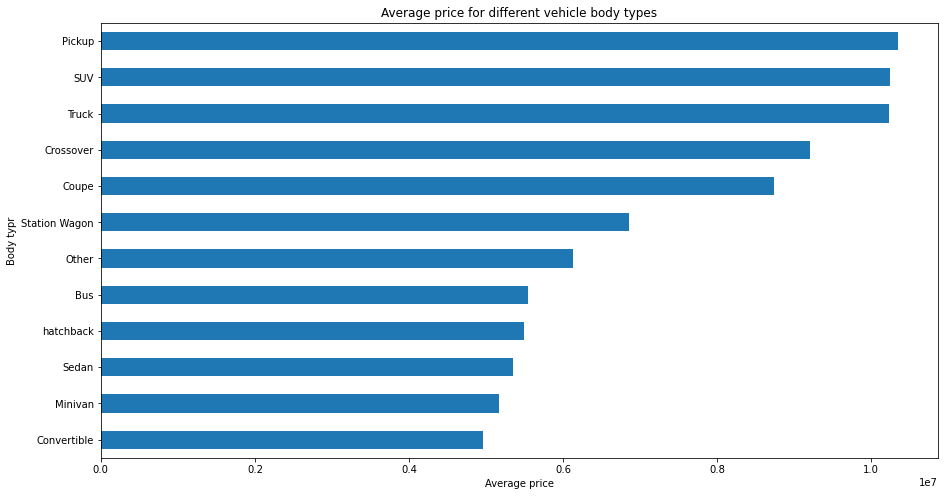

In [39]:
plt.figure(figsize=(15,8))
vehicle_avg.plot.barh();
plt.title('Average price for different vehicle body types');
plt.ylabel('Body typr');
plt.xlabel('Average price');

## 7. Modeling

In [40]:
vehicles.head()

,year,mileage,marketplacePrice,model_name,model_brand_name,transmission,fuelType,sellingCondition,bodyType,mileageUnit,interiorColor,exteriorColor,engineType,gradeScore,isFirstOwner
0,2011,157208,5715000,Venza,Toyota,automatic,petrol,foreign,SUV,km,Grey,Silver,6-cylinder(I6),5.0,True
1,2018,85411,8315000,GS8,GAC,automatic,petrol,foreign,SUV,km,Black,Black,4-cylinder(I4),5.0,True
2,2006,89837,2715000,Corolla,Toyota,automatic,petrol,foreign,Sedan,km,Grey,Silver,4-cylinder(I4),4.5,True
3,2009,175510,7015000,Venza,Toyota,automatic,petrol,foreign,SUV,km,Beige,Black,4-cylinder(I4),3.9,True
4,2009,91158,3115000,Camry,Toyota,automatic,petrol,foreign,Sedan,km,Grey,Silver,4-cylinder(I4),4.5,True


To further prepare the vehicle datasets, we can check for outliers. Outliers occur as a result of a typing mistake or the variance in the data. First, we will use a box-plot to visualize the marketplacePrice feature.

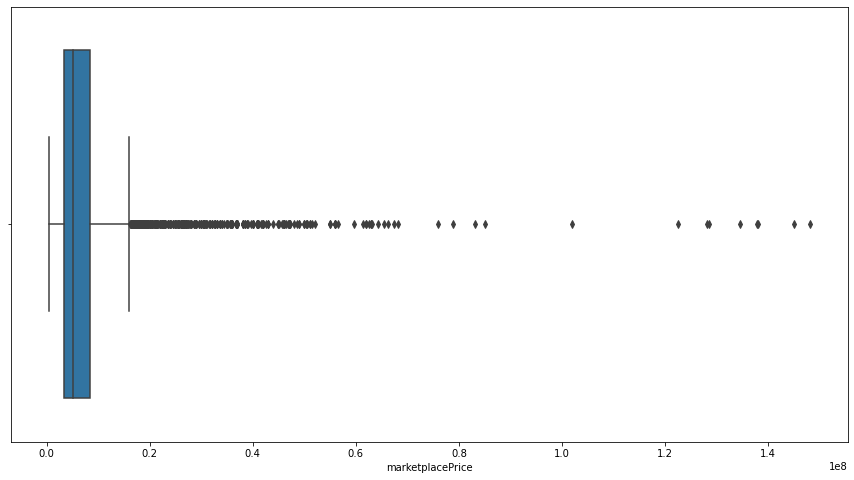

In [41]:
plt.figure(figsize=(15,8))
sns.boxplot(x=vehicles['marketplacePrice']);

In the above plot shows several points from $0.2 x 10^8$ and above, these are outliers as there are not included in the box of other observation i.e no where near the quartiles. 

In the next 2 cells, we will utilize the IQR method to display data and outliers. But first we need to calculate the IQR score.

In [42]:
Q1 = vehicles[['year', 'mileage', 'marketplacePrice', 'gradeScore']].quantile(0.25)
Q3 = vehicles[['year', 'mileage', 'marketplacePrice', 'gradeScore']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year                      6.0
mileage               90409.0
marketplacePrice    5100000.0
gradeScore                0.2
dtype: float64


We will assume that there is some bias in the prices of some vehicles. maybe the vehicle is over-priced or there was a mistake in inputing the vehicle price. Dropping the outliers will reduce our data samples by approximately 21%. But to get predictions we can drop these samples.

In [43]:
vehicles = vehicles[~((vehicles < (Q1 - 1.5 * IQR)) |(vehicles > (Q3 + 1.5 * IQR))).any(axis=1)]
vehicles

,year,mileage,marketplacePrice,model_name,model_brand_name,transmission,fuelType,sellingCondition,bodyType,mileageUnit,interiorColor,exteriorColor,engineType,gradeScore,isFirstOwner
0,2011,157208,5715000,Venza,Toyota,automatic,petrol,foreign,SUV,km,Grey,Silver,6-cylinder(I6),5.0,True
1,2018,85411,8315000,GS8,GAC,automatic,petrol,foreign,SUV,km,Black,Black,4-cylinder(I4),5.0,True
2,2006,89837,2715000,Corolla,Toyota,automatic,petrol,foreign,Sedan,km,Grey,Silver,4-cylinder(I4),4.5,True
4,2009,91158,3115000,Camry,Toyota,automatic,petrol,foreign,Sedan,km,Grey,Silver,4-cylinder(I4),4.5,True
5,2009,51001,3615000,Corolla,Toyota,automatic,petrol,foreign,Sedan,km,Grey,Red,4-cylinder(I4),5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,2021,0,15715000,NPR,Isuzu,manual,diesel,new,Truck,km,Grey,White,6-cylinder(V6),5.0,True
4945,2008,0,5015000,Econoline,Ford,automatic,petrol,foreign,Truck,km,Grey,White,8-cylinder(V8),4.7,True
4946,2009,0,5315000,Econoline,Ford,automatic,diesel,foreign,Truck,km,Grey,White,8-cylinder(V8),4.8,True
4949,2008,177066,4215000,Ridgeline,Honda,automatic,petrol,foreign,Truck,km,Dark Grey,Dark Grey,6-cylinder(V6),4.9,True


Again, we can use a histplot to visualize the prize distribution of the new vehicle dataset.

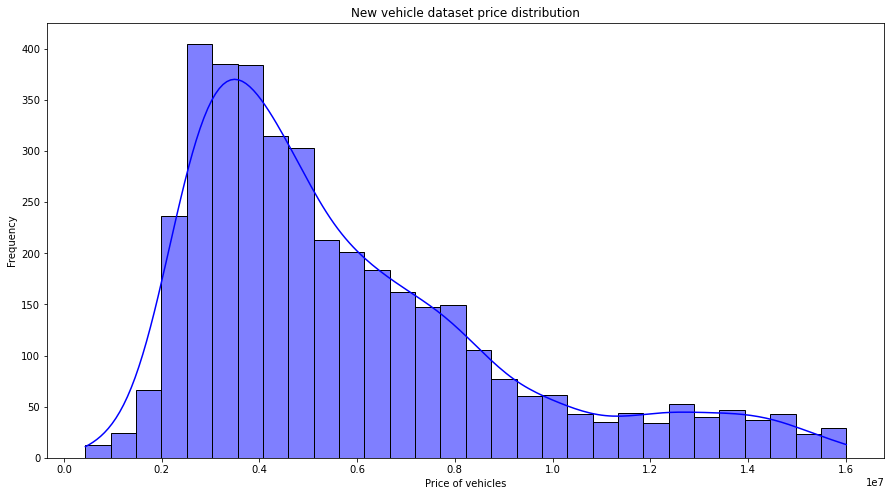

In [44]:
plt.figure(figsize=(15,8))
ax = sns.histplot(vehicles['marketplacePrice'].values, color="blue", kde=True, bins=30).set_title('New vehicle dataset price distribution');
# ax = sns.scatterplot(data=vehicles, x='marketplacePrice', y='mileage')
plt.xlabel('Price of vehicles');
plt.ylabel('Frequency');

In [45]:
# get training samples and target variable

Y = vehicles['marketplacePrice']
X = vehicles.drop('marketplacePrice', axis=1)

X.head()

,year,mileage,model_name,model_brand_name,transmission,fuelType,sellingCondition,bodyType,mileageUnit,interiorColor,exteriorColor,engineType,gradeScore,isFirstOwner
0,2011,157208,Venza,Toyota,automatic,petrol,foreign,SUV,km,Grey,Silver,6-cylinder(I6),5.0,True
1,2018,85411,GS8,GAC,automatic,petrol,foreign,SUV,km,Black,Black,4-cylinder(I4),5.0,True
2,2006,89837,Corolla,Toyota,automatic,petrol,foreign,Sedan,km,Grey,Silver,4-cylinder(I4),4.5,True
4,2009,91158,Camry,Toyota,automatic,petrol,foreign,Sedan,km,Grey,Silver,4-cylinder(I4),4.5,True
5,2009,51001,Corolla,Toyota,automatic,petrol,foreign,Sedan,km,Grey,Red,4-cylinder(I4),5.0,True


In order to have a consistent data type and data format across all columns, we will remove extra white spaces and convert strings to all lowercase in each column of the dataset. We will also relace a few characters in the interior and exterior features.

In [46]:
# save train data X to csv

X['model_name'] = X['model_name'].apply(lambda row: row.strip().lower())
X['model_brand_name'] = X['model_brand_name'].apply(lambda row: row.strip().lower())
X['interiorColor'] = X['interiorColor'].apply(lambda row: row.strip().lower())
X['exteriorColor'] = X['exteriorColor'].apply(lambda row: row.strip().lower())
X['bodyType'] = X['bodyType'].apply(lambda row: row.strip().lower())
X['engineType'] = X['engineType'].apply(lambda row: row.strip().lower())

X['interiorColor'] = X['interiorColor'].apply(lambda row: row.replace('and', '&'))
X['interiorColor'] = X['interiorColor'].apply(lambda row: row.replace('ad', '&'))
X['interiorColor'] = X['interiorColor'].apply(lambda row: row.replace('/', ' & '))
X['interiorColor'] = X['interiorColor'].apply(lambda row: row.replace('off white', 'off-white'))
X['interiorColor'] = X['interiorColor'].apply(lambda row: row.replace('off- white', 'off-white'))

X['exteriorColor'] = X['exteriorColor'].apply(lambda row: row.replace('and', '&'))
X['exteriorColor'] = X['exteriorColor'].apply(lambda row: row.replace('ad', '&'))
X['exteriorColor'] = X['exteriorColor'].apply(lambda row: row.replace('/', ' & '))

# X.to_csv('X_clean.csv', index=False)

X

,year,mileage,model_name,model_brand_name,transmission,fuelType,sellingCondition,bodyType,mileageUnit,interiorColor,exteriorColor,engineType,gradeScore,isFirstOwner
0,2011,157208,venza,toyota,automatic,petrol,foreign,suv,km,grey,silver,6-cylinder(i6),5.0,True
1,2018,85411,gs8,gac,automatic,petrol,foreign,suv,km,black,black,4-cylinder(i4),5.0,True
2,2006,89837,corolla,toyota,automatic,petrol,foreign,sedan,km,grey,silver,4-cylinder(i4),4.5,True
4,2009,91158,camry,toyota,automatic,petrol,foreign,sedan,km,grey,silver,4-cylinder(i4),4.5,True
5,2009,51001,corolla,toyota,automatic,petrol,foreign,sedan,km,grey,red,4-cylinder(i4),5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,2021,0,npr,isuzu,manual,diesel,new,truck,km,grey,white,6-cylinder(v6),5.0,True
4945,2008,0,econoline,ford,automatic,petrol,foreign,truck,km,grey,white,8-cylinder(v8),4.7,True
4946,2009,0,econoline,ford,automatic,diesel,foreign,truck,km,grey,white,8-cylinder(v8),4.8,True
4949,2008,177066,ridgeline,honda,automatic,petrol,foreign,truck,km,dark grey,dark grey,6-cylinder(v6),4.9,True


Furthermore, we will parse replace some colour types to have a more consistent colours across all type of vehicles. 

In [47]:
colors_replacement = {'ash colour': 'ash', 'ash mixed with grey color': 'ash & grey',
                      'ashley': 'ash', 'beige': 'biege', 'biege & black': 'biege & black',
                      'black & beige': 'biege & black', 'black on brown': 'black & brown',
                      'brown & black': 'black & brown', 'creame': 'cream', 'crean': 'cream',
                      'creme': 'cream', 'cream colour': 'cream', 'dark ash': 'ash', 'dark blue': 'blue',
                      'dark blue & grey': 'blue & grey', 'dark green': 'green',
                      'dark grey': 'grey', 'dark grey & blue': 'blue & grey', 
                      'dotted black grey': 'grey', 'grey & ash': 'ash & grey', 'gray': 'grey', 'grey & black': 'black & grey',
                      'grey & blue': 'blue & grey', 'grey & dark grey': 'grey', 'ivort': 'ivory',
                      'light  brown': 'brown', 'light brown': 'brown', 'light grey': 'grey',
                      'milk': 'white', 'milk & black': 'white & black', 'milk & chocolate': 'white & brown',
                      'milk color': 'white', 'milk colour': 'white', 'parchment colour': 'parchment', 'red & black': 'black & red',
                      'wine': 'red'}

In [48]:
X['interiorColor'] = X['interiorColor'].apply(lambda row: colors_replacement[row] if \
                                              row in colors_replacement.keys() else row)

Due to the similarity between interior and exterior colors, we can drop the exterior color. 

In [49]:
X[['isFirstOwnerDummy']] = pd.get_dummies(X['isFirstOwner'], drop_first=True)
X[['transmissionDummy']] = pd.get_dummies(X['transmission'], drop_first=True)
X[['fuelTypeDummy']] = pd.get_dummies(X['fuelType'], drop_first=True)
X[['mileageUnitDummy']] = pd.get_dummies(X['mileageUnit'], drop_first=True)
X.drop(['isFirstOwner', 'transmission', 'fuelType', 'mileageUnit', 'exteriorColor'], axis=1, inplace=True)


In [50]:
X.head()

,year,mileage,model_name,model_brand_name,sellingCondition,bodyType,interiorColor,engineType,gradeScore,isFirstOwnerDummy,transmissionDummy,fuelTypeDummy,mileageUnitDummy
0,2011,157208,venza,toyota,foreign,suv,grey,6-cylinder(i6),5.0,1,0,1,0
1,2018,85411,gs8,gac,foreign,suv,black,4-cylinder(i4),5.0,1,0,1,0
2,2006,89837,corolla,toyota,foreign,sedan,grey,4-cylinder(i4),4.5,1,0,1,0
4,2009,91158,camry,toyota,foreign,sedan,grey,4-cylinder(i4),4.5,1,0,1,0
5,2009,51001,corolla,toyota,foreign,sedan,grey,4-cylinder(i4),5.0,1,0,1,0


In [51]:
# sorted(X['interiorColor'].unique())

In [52]:
# convert letters to lower case in each column

X_dtypes = X.dtypes[X.dtypes == 'object'].index

for t in X_dtypes:
    X[t] = X[t].apply(lambda row: row.lower())
X

,year,mileage,model_name,model_brand_name,sellingCondition,bodyType,interiorColor,engineType,gradeScore,isFirstOwnerDummy,transmissionDummy,fuelTypeDummy,mileageUnitDummy
0,2011,157208,venza,toyota,foreign,suv,grey,6-cylinder(i6),5.0,1,0,1,0
1,2018,85411,gs8,gac,foreign,suv,black,4-cylinder(i4),5.0,1,0,1,0
2,2006,89837,corolla,toyota,foreign,sedan,grey,4-cylinder(i4),4.5,1,0,1,0
4,2009,91158,camry,toyota,foreign,sedan,grey,4-cylinder(i4),4.5,1,0,1,0
5,2009,51001,corolla,toyota,foreign,sedan,grey,4-cylinder(i4),5.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,2021,0,npr,isuzu,new,truck,grey,6-cylinder(v6),5.0,1,1,0,0
4945,2008,0,econoline,ford,foreign,truck,grey,8-cylinder(v8),4.7,1,0,1,0
4946,2009,0,econoline,ford,foreign,truck,grey,8-cylinder(v8),4.8,1,0,0,0
4949,2008,177066,ridgeline,honda,foreign,truck,grey,6-cylinder(v6),4.9,1,0,1,0


In [53]:
# get dummy variable for remaining categorical variables.

X = pd.get_dummies(X)
X.head()

,year,mileage,gradeScore,isFirstOwnerDummy,transmissionDummy,fuelTypeDummy,mileageUnitDummy,model_name_1017,model_name_1069,model_name_19.314 filt-n,...,engineType_18-cylinder(v18),engineType_3-cylinder(i3),engineType_4-cylinder(h4),engineType_4-cylinder(i4),engineType_5-cylinder(i5),engineType_6-cylinder(h6),engineType_6-cylinder(i6),engineType_6-cylinder(v6),engineType_8-cylinder(i8),engineType_8-cylinder(v8)
0,2011,157208,5.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2018,85411,5.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2006,89837,4.5,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2009,91158,4.5,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,2009,51001,5.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


We will need to scale our features, this will enable us to compare both scaled and non-scaled performances.

In [54]:
scaler = preprocessing.MinMaxScaler()

X_scaled = scaler.fit_transform(X)

For this project we will split the data sample into 80% for training sample and 20% for the test sample.

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) # train_test_split(X_new_, Y, test_size=0.2) # train_test_split(X, Y, test_size=0.2)
x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, Y, test_size=0.2) # train_test_split(X_new_, Y, test_size=0.2)

In [56]:
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean


def model(algorithm, x_train, y_train, x_test, y_test): 
    
    algorithm.fit(x_train, y_train)
    y_pred = algorithm.predict(x_test)
    y_pred = pd.DataFrame(y_pred)
    r_squared = r2_score(y_test, y_pred)
    
    cross_val = cross_val_score(algorithm, x_train, y_train, cv=cv)
    
    # Appending results to Lists 
    r_2.append(r_squared)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",r_squared,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    plt.figure(figsize=(15,8))
    plt.scatter(y_test, y_pred, alpha = 0.5)
    plt.xlabel("y_test");
    plt.ylabel("y_pred");
    
    # Plot for prediction vs actual
    plt.figure(figsize=(15,8));
    test_index=y_test.reset_index()
    ax=test_index.plot(label="Actual values",figsize=(12,6),linewidth=2,color="r")
    ax=y_pred[0].plot(label = "Predicted values",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("Actual vs. Predicted values")
    plt.xlabel("index");
    plt.ylabel("values");
    plt.show()
    
    return algorithm

#### Linear Regression Model without feature scaling

LinearRegression() 

r_2 score : -16271954927.965069 

CV scores: [-3.01995462e+11 -1.12650964e+10 -2.05996816e+12 -1.07191439e+11
 -2.41549569e+08] 

CV scores mean: -496132341164.3761
Mean Absolute Error: 51495284511.8824
Mean Squared Error: 1.5067102772183638e+23
Root Mean Squared Error: 388163661001.17664


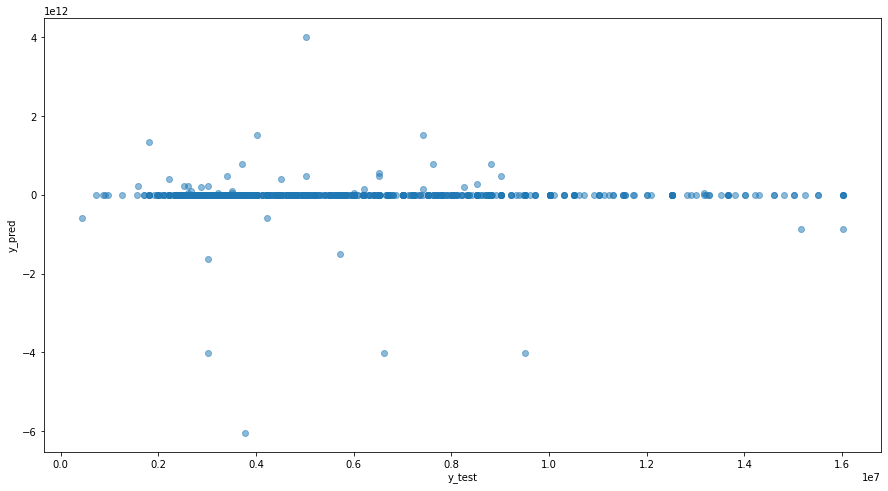

<Figure size 1080x576 with 0 Axes>

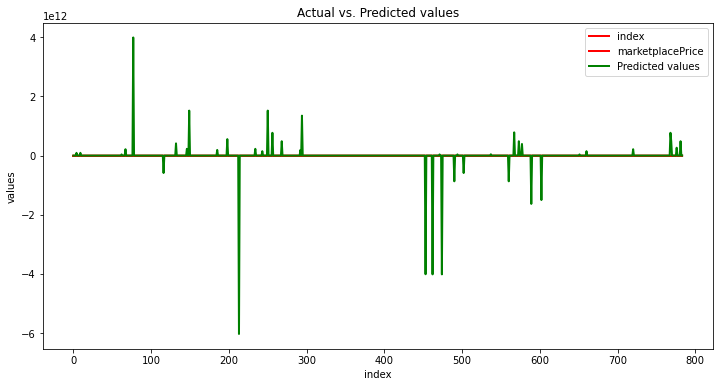

LinearRegression()

In [57]:
lr = LinearRegression()
algo_lr = model(lr, x_train,y_train, x_test, y_test)
algo_lr

#### Linear Regression Model with feature scaling

LinearRegression() 

r_2 score : -7.60292575413106e+22 

CV scores: [-1.51867288e+23 -8.72798437e+23 -2.24677580e+23 -8.94375122e+21
 -7.61959216e+22] 

CV scores mean: -2.6689659564523365e+23
Mean Absolute Error: 1.8436806420808163e+17
Mean Squared Error: 8.585496514526092e+35
Root Mean Squared Error: 9.265795440503795e+17


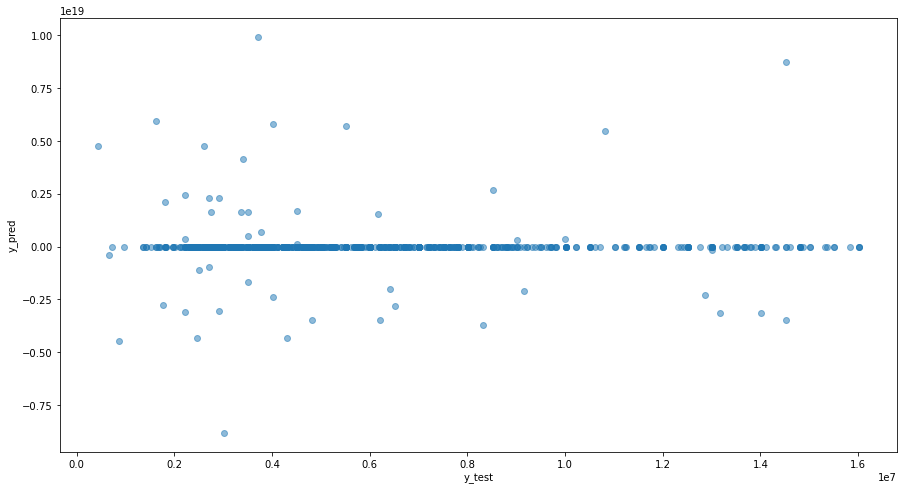

<Figure size 1080x576 with 0 Axes>

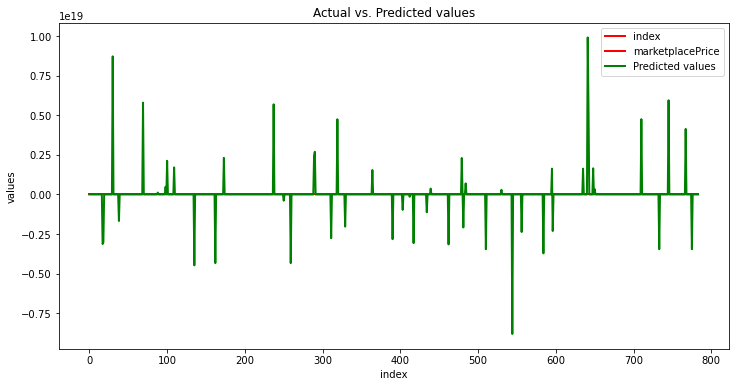

LinearRegression()

In [71]:
lr2 = LinearRegression()
algo_lr2 = model(lr, x_scaled_train, y_scaled_train, x_scaled_test, y_scaled_test)
algo_lr2

#### Random Forest Regressor Model without feature scaling

RandomForestRegressor(n_estimators=300, random_state=42) 

r_2 score : 0.8055514612027724 

CV scores: [0.86405615 0.82378888 0.82349079 0.83790048 0.83145507] 

CV scores mean: 0.8361382729649589
Mean Absolute Error: 824072.0368197279
Mean Squared Error: 1800506534555.0989
Root Mean Squared Error: 1341829.5475041154


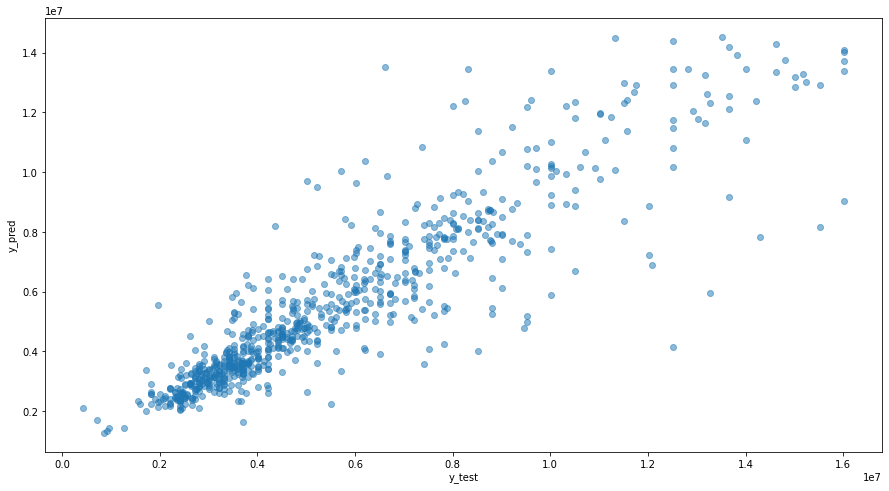

<Figure size 1080x576 with 0 Axes>

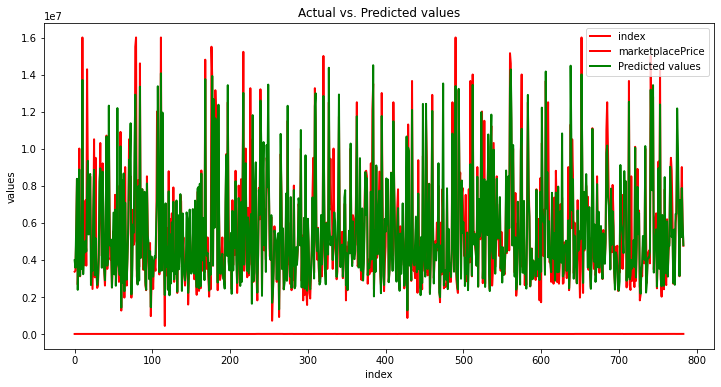

In [59]:
# 'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300, 'random_state': 42

rf = RandomForestRegressor(n_estimators = 300, random_state = 42)
ag_test = model(rf, x_train, y_train, x_test, y_test)

In [60]:
# print(y_scaled_test[0])
# ag.predict(x_scaled_test[0].reshape(1, -1))

#### Random Forest Regressor Model with feature scaling

RandomForestRegressor(n_estimators=300, random_state=42) 

r_2 score : 0.8271598086935927 

CV scores: [0.80421881 0.82209888 0.84036072 0.83350551 0.83779034] 

CV scores mean: 0.8275948500096373
Mean Absolute Error: 834110.1651360545
Mean Squared Error: 1951773446195.8845
Root Mean Squared Error: 1397058.8556663904


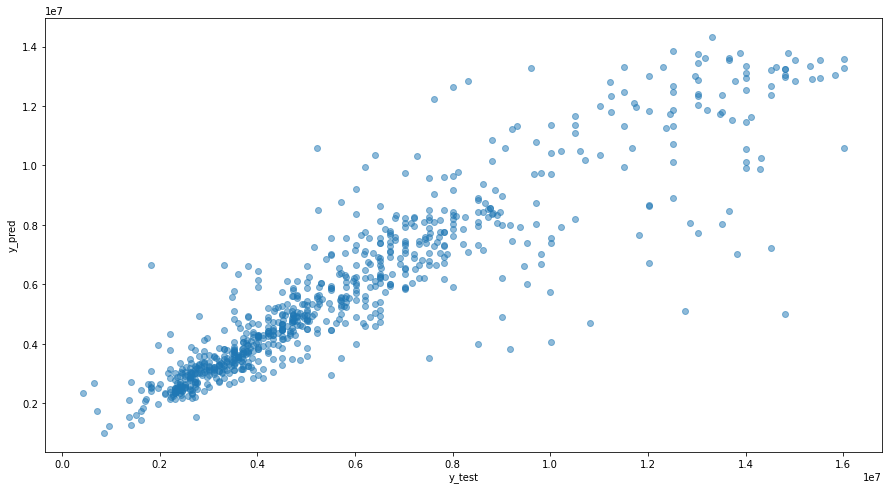

<Figure size 1080x576 with 0 Axes>

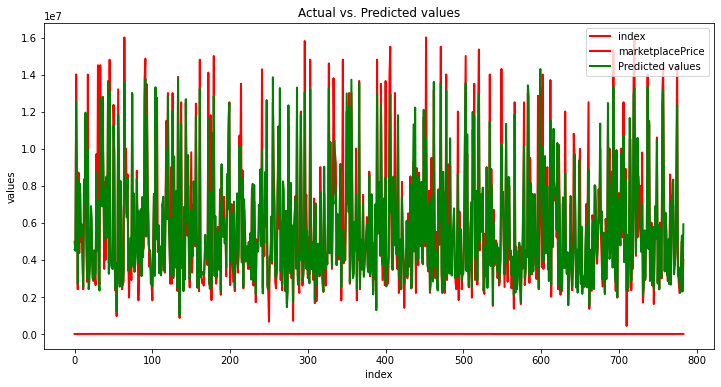

In [61]:
rf = RandomForestRegressor(n_estimators = 300, random_state = 42)
aggg = model(rf, x_scaled_train, y_scaled_train, x_scaled_test, y_scaled_test)

In [62]:
# print(y_scaled_test.values[8])
# ag2.predict(x_scaled_test[8].reshape(1, -1))

#### Decision Tree Regressor Model without feature scaling

DecisionTreeRegressor() 

r_2 score : 0.6834335877286243 

CV scores: [0.73290013 0.71542118 0.65556997 0.76843498 0.74517471] 

CV scores mean: 0.7235001936641055
Mean Absolute Error: 1031612.1326530612
Mean Squared Error: 2931263446055.796
Root Mean Squared Error: 1712093.293619187


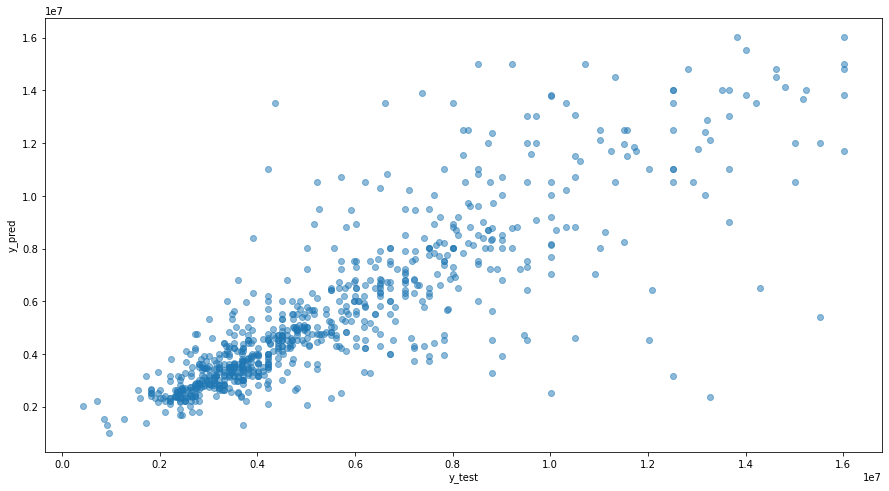

<Figure size 1080x576 with 0 Axes>

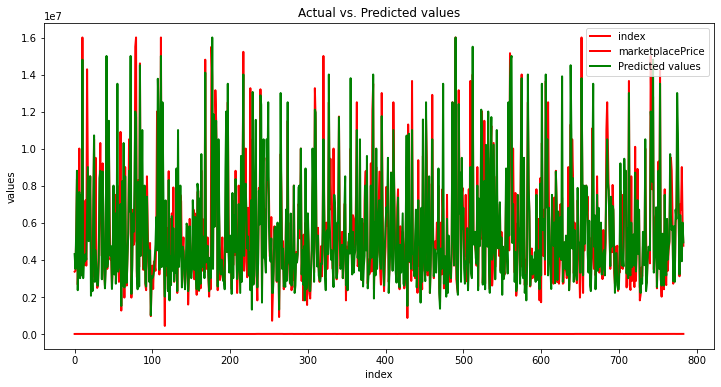

DecisionTreeRegressor()

In [63]:
dtr = DecisionTreeRegressor()
model(dtr, x_train, y_train, x_test, y_test)

#### Decision Tree Regressor Model with feature scaling

DecisionTreeRegressor() 

r_2 score : 0.6914651937882295 

CV scores: [0.71978173 0.72701334 0.76930219 0.73718096 0.72736316] 

CV scores mean: 0.7361282770645484
Mean Absolute Error: 1071947.0663265307
Mean Squared Error: 3484085717793.367
Root Mean Squared Error: 1866570.5766976418


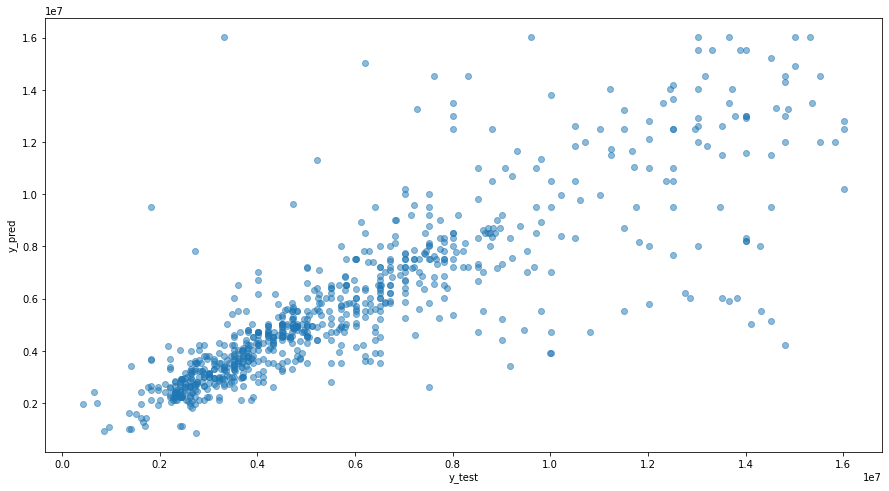

<Figure size 1080x576 with 0 Axes>

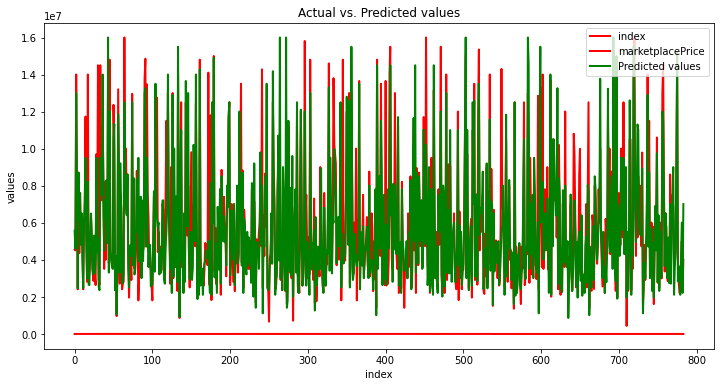

DecisionTreeRegressor()

In [72]:
dtr2 = DecisionTreeRegressor()
model(dtr2, x_scaled_train, y_scaled_train, x_scaled_test, y_scaled_test)

#### AdaBoost Regressor Model

AdaBoostRegressor(n_estimators=100, random_state=42) 

r_2 score : 0.5344048368408674 

CV scores: [0.61211575 0.58159177 0.57842222 0.61313173 0.58332151] 

CV scores mean: 0.5937165955080221
Mean Absolute Error: 1658257.3691226896
Mean Squared Error: 4311203051000.8545
Root Mean Squared Error: 2076343.673624589


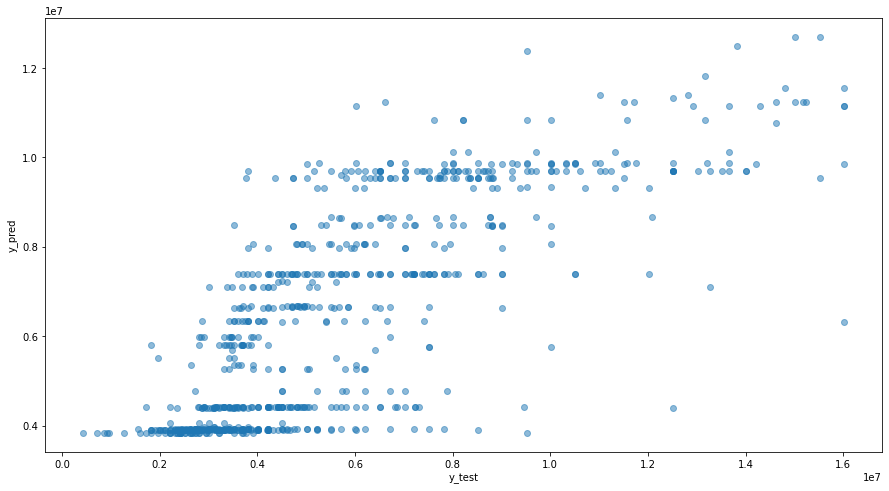

<Figure size 1080x576 with 0 Axes>

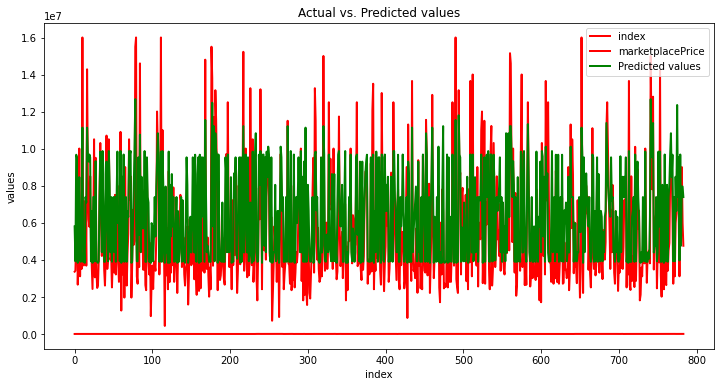

AdaBoostRegressor(n_estimators=100, random_state=42)

In [64]:
regr_ab = AdaBoostRegressor(random_state=42, n_estimators=100)
model(regr_ab, x_train, y_train, x_test, y_test)

In [81]:
performance_df = pd.DataFrame({'RandomForestRegressor(no scaling)':[0.8055514612027724, 0.8361382729649589, 824072.0368197279,
                                                       1800506534555.0989, 1341829.5475041154],
                               'RandomForestRegressor(scaling)':[0.8271598086935927 , 0.8275948500096373, 834110.1651360545,
                                                       1951773446195.8845, 1397058.8556663904],
                               'LinearRegression(no scaling)':[-16271954927.965069, -496132341164.3761, 51495284511.8824,
                                                  1.5067102772183638e+23, 388163661001.17664],
                               'LinearRegression(scaling)':[-7.60292575413106e+22 , -2.6689659564523365e+23, 1.8436806420808163e+17,
                                                  8.585496514526092e+35, 9.265795440503795e+17],
                               'DecisionTreeeRegressor(no scaling)':[0.6834335877286243, 0.7235001936641055, 1031612.1326530612,
                                                  2931263446055.796, 1712093.293619187],
                               'DecisionTreeeRegressor(scaling)':[0.6914651937882295, 0.7361282770645484, 1071947.0663265307,
                                                  3484085717793.367, 1866570.5766976418],
                               'AdaBoost Regressor(no scaling)':[0.5344048368408674, 0.5937165955080221, 1658257.3691226896,
                                                  4311203051000.8545, 2076343.673624589],
                               }, index=['r2Score', 'CV mean score', 'MAE', 'MSE', 'RMSE'])

From the above trained models, we can see that the RandomForestRegressor model without scaling has the best average performance CV score and r2 score of 83% and 85% respectively. The model with the best performance has an r2 score of 81%. 

Although, the Mean Absolute Error (MSE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for each model above is very large, we can also observe that the selected choice of model has the best of these errors.  

### 8. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [65]:
print('Saving file to sqlite database....')
engine = create_engine('sqlite:///vehicle_price_prediction.db')
X.to_sql('vehicle_price_prediction', engine, index=False, if_exists="replace")
print('Saving complete!')

Saving file to sqlite database....
Saving complete!


### Refinement

There were quite a number of challenges in this project. One major challenge was trying to improve the performance of the models. Each machine learning model was trained with and without scaling. It can be observed that fir our selected model (RandomForestRegressor), traing without scaling has a better performance. Another technique used in the process of improving upon the algorithms was a CV pipeline. However, for ease these were not decoumented as it will make the script to run for a very long period of time. After initially running this initial exhaustive script I was able to select the best hyperparametr for the models. The dataframe below displays the results for different regression models used.

In [82]:
performance_df

,RandomForestRegressor(no scaling),RandomForestRegressor(scaling),LinearRegression(no scaling),LinearRegression(scaling),DecisionTreeeRegressor(no scaling),DecisionTreeeRegressor(scaling),AdaBoost Regressor(no scaling)
r2Score,8.055515e-01,8.271598e-01,-1.627195e+10,-7.602926e+22,6.834336e-01,6.914652e-01,5.344048e-01
CV mean score,8.361383e-01,8.275949e-01,-4.961323e+11,-2.668966e+23,7.235002e-01,7.361283e-01,5.937166e-01
MAE,8.240720e+05,8.341102e+05,5.149528e+10,1.843681e+17,1.031612e+06,1.071947e+06,1.658257e+06
MSE,1.800507e+12,1.951773e+12,1.506710e+23,8.585497e+35,2.931263e+12,3.484086e+12,4.311203e+12
RMSE,1.341830e+06,1.397059e+06,3.881637e+11,9.265795e+17,1.712093e+06,1.866571e+06,2.076344e+06


### 10. Future Improvements

Some of the future improvements includes:

* Get more data samples across other vehicle sales platforms in Nigeria
* Improve recommendation engine

### 11. References

1. https://towardsdatascience.com/identify-your-datas-distribution-d76062fc0802 
2. https://www.kaggle.com/cagkanbay/car-price-prediction
3. https://towardsdatascience.com/statistics-supporting-linear-models-bfc24fb9781f
4. https://datascience.stackexchange.com/questions/30465/tips-to-improve-linear-regression-model
5. https://medium.com/analytics-vidhya/ways-to-improve-a-linear-regression-model-e2c75fc0bdfd